In [12]:
# Building retention curve through logarithmic-linear interpolation imputing for not known days. (D0, D2, D3, D5, D6, D8, ... D15)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def retention_curve(d1, d3, d7, d14, maximum=30):

    """
    This functions as exponentially decay retention over time. 
    This looks the correct method because retention in mobile games is most likely exponentially decay.

    - D0 retention assumed as 1.0 because the user downloads counted as 1 and likely play the game after downloaded.   
    - Retention ratios assigned to parameters ; d1, d3, d7, d14 as float data type. 
    - maximum : This parameters works as the last day of retention according to the c), d), e) questions. Data type is integer. 


    """
    
    known_days = np.array([0,1,3,7,14])
    reten_rates = ([1.0, d1, d3, d7, d14])
    
    # D1, D3, D7 and D14 are known retention points. The reason for (max + 1) is python language not includes the second parameter to the interval. 
    # Starts from 0 to the max - 1 so we add + 1 to achieve max.
    reten_days = np.arange(0, maximum + 1)
    
    # Logarithmic-linear interpolation

    """
    This method is based on from a pure mathematical model. Since the decay is exponentially and we want to predict the retention days:
    
    R(t) = A. e ^ -kt

    R(t) = Active users for t th day
    A = Starting point (D0 = 1)
    k = Chrun rate

    When we take logarithms of parameters on the function: log(R(t)) = log(A) - kt  
    
    """
    
    log_reten_known = np.log(reten_rates)
    
    # np.interp method predicting the log-rates as linearly for the retention points   
    log_reten_days = np.interp(reten_days, known_days, log_reten_known)
    
    # Go back to the first retention points
    reten_back  = np.exp(log_reten_days)

    # We do not have the data for after 14 days retention points. So, assuming that the decay goes down as we decied:    
    slope = (np.log(d14) - np.log(d7)) / 7

    
    for day in range(15, maximum + 1):
        reten_back[day] = np.exp(np.log(d14) + slope * (day - 14))

    return pd.Series(reten_back, index=reten_days, name="retention")


In [13]:
# Testing A/B Variants through log-linear interpolated variants of A and B. 

A = retention_curve(0.53, 0.27, 0.17, 0.06, maximum=30)
B = retention_curve(0.48, 0.25, 0.19, 0.09, maximum=30)

print(round(A.loc[0:15], 2))
print(round(B.loc[0:15], 2))


0     1.00
1     0.53
2     0.38
3     0.27
4     0.24
5     0.21
6     0.19
7     0.17
8     0.15
9     0.13
10    0.11
11    0.09
12    0.08
13    0.07
14    0.06
15    0.05
Name: retention, dtype: float64
0     1.00
1     0.48
2     0.35
3     0.25
4     0.23
5     0.22
6     0.20
7     0.19
8     0.17
9     0.15
10    0.14
11    0.12
12    0.11
13    0.10
14    0.09
15    0.08
Name: retention, dtype: float64


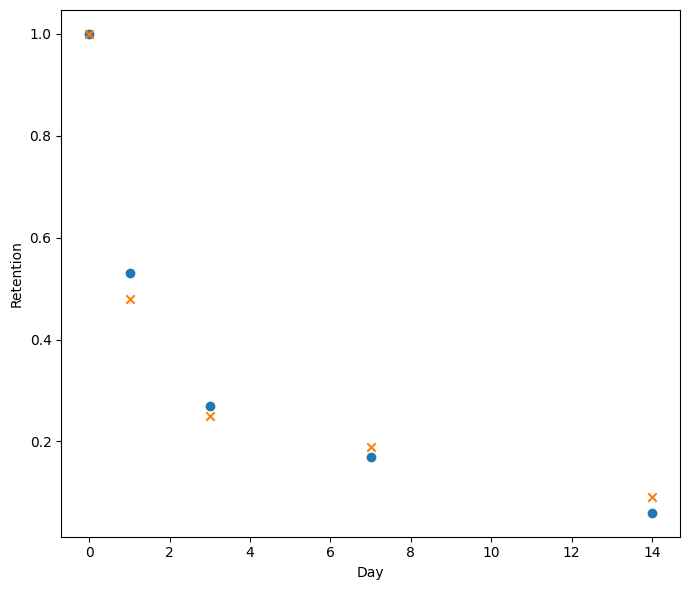

In [38]:
# Scatter plotting retention curves
known_days = np.array([0,1,3,7,14])
labels = ["D1", "D3", "D7", "D14"]

plt.figure(figsize = (7,6))
plt.scatter(known_days, A.loc[known_days], marker="o")
plt.scatter(known_days, B.loc[known_days], marker="x")
plt.xlabel('Day')
plt.ylabel('Retention')
plt.tight_layout()
plt.show()


The marked ones with "O" where located in the line plot tells us that they are Variant A retention points. The "X" markers are retention points of Variant B. The graphic says that in D7 and D14, Variant B players will rotate to the game more than Variant A players. On the other hand, Variant A players in D1 and D3 looks like more likely to come back to the game than Variant B players. In the long term, accourding to log-linear interpolated retention points, Variant B looks more beneficial.        

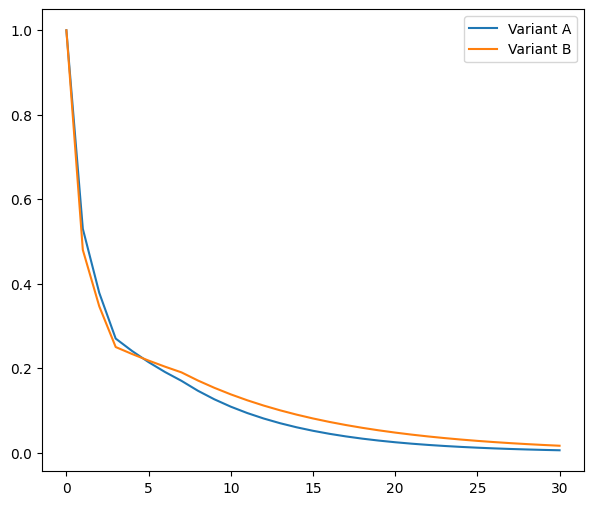

In [25]:
# Line plotting retention curves

plt.figure(figsize = (7,6))
plt.plot(A.index, A.values, label = "Variant A")
plt.plot(B.index, B.values, label = "Variant B")
plt.legend()
plt.show()
